In [54]:
#####Unsupervised Truth Discovery from Heterogeneous data source#####
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import numpy.matlib
import scipy.linalg
import itertools
from scipy import sparse
from scipy.stats import norm
from pandas.tools.plotting import scatter_matrix
from numpy.random import *
from scipy import optimize

#np.random.seed(98537)

In [55]:
##多項分布の乱数を生成する関数
def rmnom(pr, n, k, pattern):
    if pattern==1:
        z_id = np.array(np.argmax(np.cumsum(pr, axis=1) >= np.random.uniform(0, 1, n)[:, np.newaxis], axis=1), dtype="int")
        Z = np.diag(np.repeat(1, k))[z_id, ]
        return z_id, Z
    z_id = np.array(np.argmax((np.cumsum(pr, axis=1) >= np.random.uniform(0, 1, n)[:, np.newaxis]), axis=1), dtype="int")
    return z_id

In [56]:
####データの生成####
##データの設定
M = 200
S = 3
hh = np.random.poisson(500, S)
n = np.sum(hh)
s_id = np.repeat(np.arange(S), hh)
pt = np.random.poisson(17.5, n)
pt[pt < 5] = 5 
hhpt = np.array([np.sum(pt[s_id==j]) for j in range(S)])
N = np.sum(hhpt)

In [57]:
##IDとインデックスの作成
#IDを作成
d_id = np.repeat(np.arange(n), pt)
pt_id = np.array(list(itertools.chain(*[np.array(range(pt[i]), dtype="int") for i in range(n)])))

#インデックスを作成
d_list = [i for i in range(n)]
s_list = [j for j in range(S)]
for i in range(n):
    d_list[i] = np.array(np.where(d_id==i)[0], dtype="int")
for j in range(S):
    s_list[j] = np.array(np.where(s_id==j)[0], dtype="int")

In [58]:
##Side-Effectの割当を生成
#トピック割当を生成
topic = 25
phi0 = np.random.dirichlet(np.repeat(0.5, M), topic)
theta0 = np.random.dirichlet(np.repeat(0.5, topic), n)
z = rmnom(theta0[d_id, ], N, topic, 0)

#多項分布からSide-Effectを生成
effect_id = np.repeat(0, N)
for i in range(n):
    effect_id[d_list[i]] = rmnom(phi0[z[d_list[i]], ], pt[i], M, 0)
    
#インデックスの作成
effect_list = [i for i in range(M)]
effect_n = np.repeat(0, M)
for i in range(M):
    effect_list[i] = np.array(np.where(effect_id==i)[0], dtype="int")
    effect_n[i] = effect_list[i].shape[0]

(array([ 2., 15., 21., 41., 41., 35., 25., 12.,  7.,  1.]),
 array([0.16312138, 0.21402273, 0.26492409, 0.31582545, 0.3667268 ,
        0.41762816, 0.46852952, 0.51943087, 0.57033223, 0.62123359,
        0.67213494]),
 <a list of 10 Patch objects>)

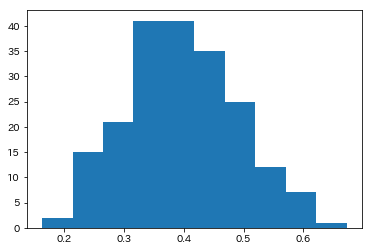

In [62]:
####応答変数を生成####

##パラメータの生成
gamma1 = 2.5; gamma0 = 25.0
eta1 = 15.0; eta0 = 10.0
